# 多層パーセプトロン (MLP: Multi-Layer Perceptron)

単純パーセプトロンでは線形分離できない問題を解くことができなかったのに複数のパーセプトロンを階層構造にして組み合わせることで構築する

機械学習手法を使って，データそれぞれに対して，それらの属するクラスを推測するシステムを組みたいとします．この問題はたとえば，身長・体重から性別を推測するようなものです．ここで性別は __クラス__ として扱われ，このような問題を __クラス分類__ と呼びます．

パターン認識と機械学習の分野では，iris datsetというアヤメの花のデータセットが例題としてよく用いられるので，これに倣って私たちもiris datasetを例に説明を行います．


```{warning}
多くの人の環境でインストールされていなさそうなjapanize_matplotlibだけtryに入れてあります．
この他にもimport errorが出るパッケージがあれば適宜インストールしてください．
```

In [1]:
# packageのimport
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
try: 
    import japanize_matplotlib
except:
    !pip install japanize_matplotlib
    import japanize_matplotlib

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

データ全体を収めたDataFrameとこれを元にした散布図行列を確認してみましょう．

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


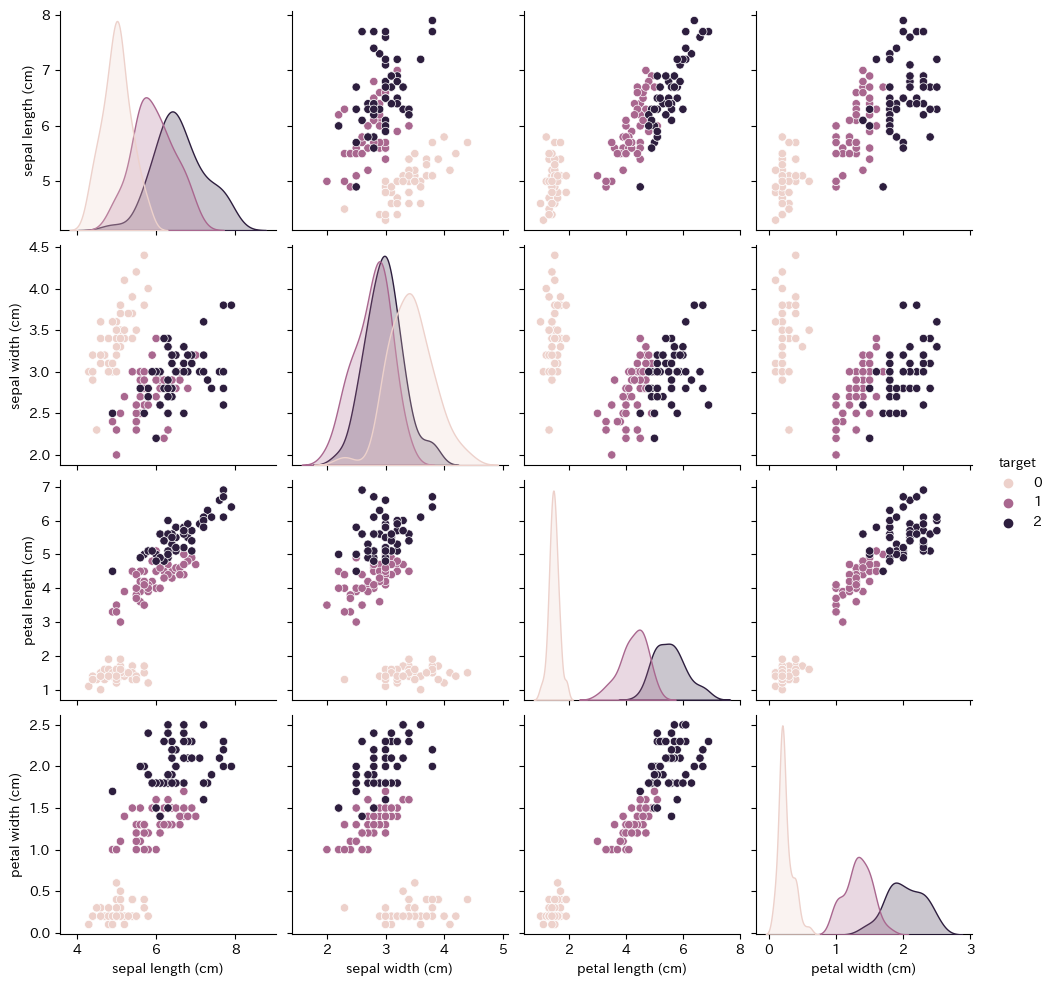

In [2]:
iris = load_iris(as_frame=True)
iris_df = iris["frame"]
X = iris["data"].to_numpy()
Y = iris["target"].to_numpy()
display(iris_df) # display関数を使えばcellの途中でもoutputを表示できる!
display(sns.pairplot(iris_df, hue="target"))

このデータは花弁や萼片の長さや幅を集めたものなので，負の数を持つことはありません．つまりデータ行列$X \in \mathbb{R}_{+}^{n \times d}$です．ここでデータの個数を$n$，特徴の数を$d$としています．またクラスは$\mathbf{y} \in \mathbb{N}^{d} $であり，それぞれは $y_i \in \{0,1,2\}$です．

$\operatorname{one-hot}(y_i)$

D次元のデータベクトル$\mathrm{x}=(x_1, x_2, \cdots, x_D )^{\mathrm{T}}$が$\mathrm{x_1},\cdots,\mathrm{x_N}$のように

このデータは花弁や萼片の長さや幅を集めたものなので，データ行列$X \in \mathbb{R}_{+}^{F \times D}$，ただしデータの個数を$D$，特徴の数を$F$としています．またクラスは$y={0,1,2}$
